In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
### Step 1: Understand the Dataset
iris = load_iris()
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(iris['target'], columns = ['target'])
dataset = pd.concat([x,y], axis = 1)
dataset.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
###Step 2: Summarize the Data
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
### Step 3: Handle Missing Values
dataset = dataset[COLUMN].fillna(dataset[COLUMN].mean())

NameError: name 'COLUMN' is not defined

In [ ]:
### Step 4: Visualize the Data
dataset.drop(['target'], axis=1).describe().drop(['count']).plot(kind='box')

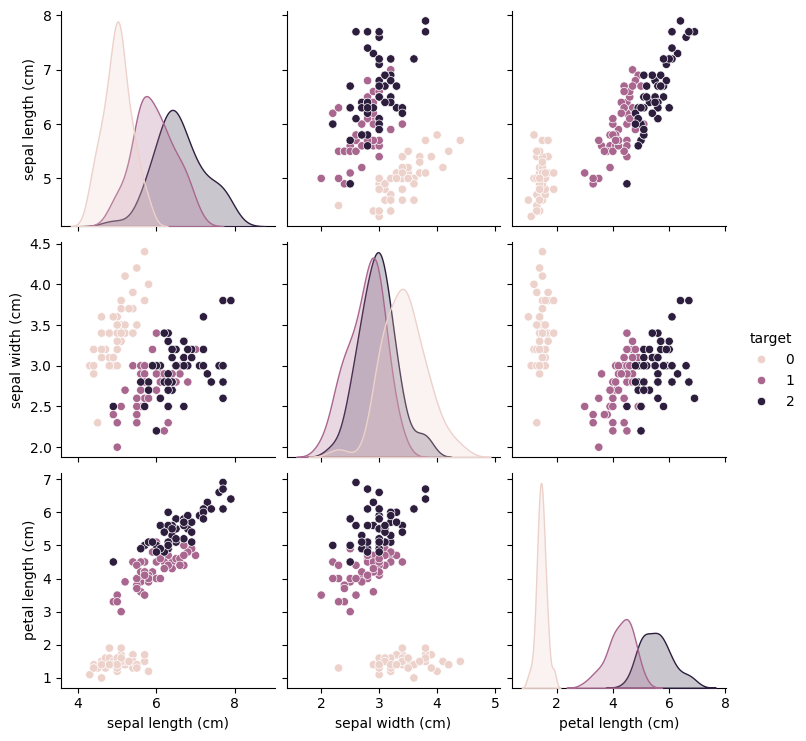

In [7]:
import seaborn as sns
sns.pairplot(dataset, hue = 'target', vars = 
             ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'])

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

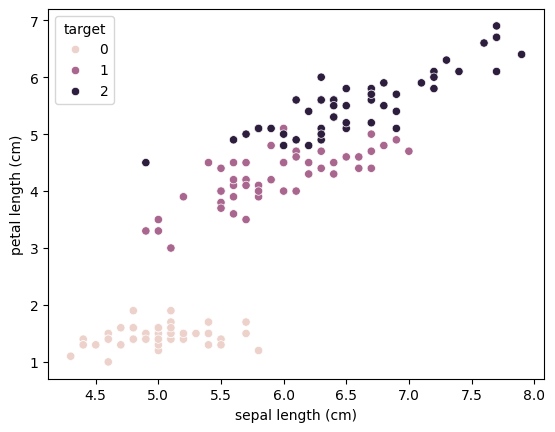

In [8]:
sns.scatterplot(x= 'sepal length (cm)' ,
                y='petal length (cm)', hue = 'target', data = dataset)

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

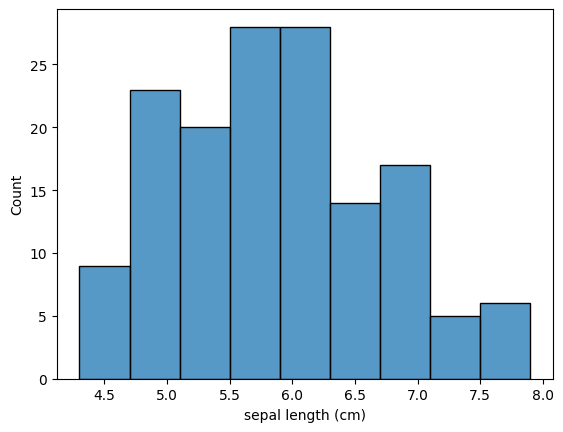

In [9]:
sns.histplot(data=dataset, x="sepal length (cm)")

In [10]:
### Step 5: Examine Relationships Between Variables
corr = dataset.dropna().corr(method='pearson')
corr
'''
pearson : 測量連續形變量的相關性
spearman : 可測量 類別變量
'''

'\npearson : 測量連續形變量的相關性\nspearman : 可測量 類別變量\n'

In [11]:
abs(corr["sepal length (cm)"]).sort_values(ascending = False) 

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
target               0.782561
sepal width (cm)     0.117570
Name: sepal length (cm), dtype: float64

<Axes: >

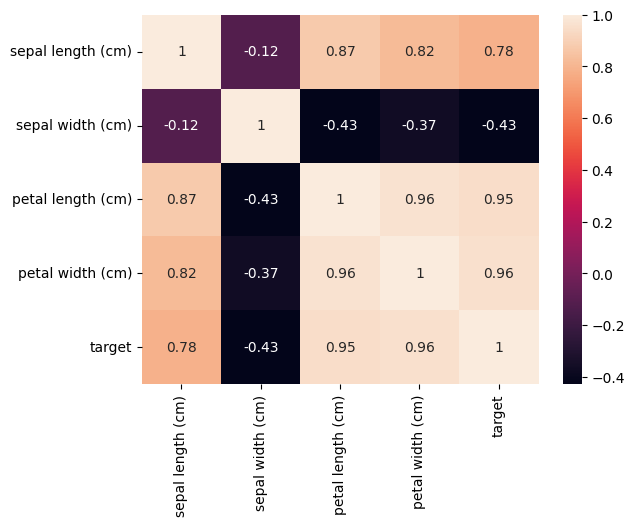

In [12]:
sns.heatmap(corr, annot = True)

In [15]:
pd.pivot_table(dataset, 
               values='sepal length (cm)', 
               index='petal length (cm)', 
               aggfunc='mean').head(3)

,sepal length (cm)
petal length (cm),
1.0,4.6
1.1,4.3
1.2,5.4


In [18]:
pd.pivot_table(dataset, 
               values='sepal length (cm)', 
               index='petal length (cm)', 
               columns='target',
               aggfunc='mean').tail(3)

target,0,1,2
petal length (cm),,,
6.6,NaN,NaN,7.6
6.7,NaN,NaN,7.7
6.9,NaN,NaN,7.7


In [34]:
### Step 6: Detect Outliers and Anomalies
'''
Z-Score : 將數據轉成 Z score ~ N(0,1), 
when |z score| > 3, it is outlier
'''
from scipy import stats
dataset[(abs(stats.zscore(dataset)) < 3).all(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# one hot encoder
dataset['category_pl'] = dataset['petal length (cm)'].apply(lambda x: 'A' if x > 4 else 'B')
dataset['category_pw'] = dataset['petal width (cm)'].apply(lambda x: 'C' if x > 1 else 'D')

In [61]:
pd.get_dummies(dataset['category_pl'], dtype=float)

,A,B
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
145,1.0,0.0
146,1.0,0.0
147,1.0,0.0
148,1.0,0.0


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset['n01'] = scaler.fit_transform(dataset[['sepal length (cm)']])

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset['minmax'] = scaler.fit_transform(dataset[['sepal length (cm)']])

In [74]:
x_cols = list(set(dataset.columns)- {'target'})
y_cols = ['target']
X = dataset[x_cols]
Y = dataset[y_cols]

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, Y)
model.feature_importances_

/var/folders/tl/_g91w4y91wq63sfy630kmsh00000gn/T/ipykernel_55888/2098861527.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, Y)


array([0.49846164, 0.09575873, 0.38122971, 0.02454992])

In [76]:
x_cols

['petal length (cm)',
 'sepal length (cm)',
 'petal width (cm)',
 'sepal width (cm)']